In [255]:
import numpy as np
import pandas as pd

In [256]:
def read_parse_data():
    data = pd.read_csv('dataset/features.csv', header=None, sep='¡')
    return data

In [257]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

def journal_clasificator_SVM(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                            alpha=1e-3, random_state=42,
                            max_iter=5, tol=None)),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction SVM: ', np.mean(predicted == y_test))

    print_metrics(predicted, y_test, ['0', '1', '2', '3'])



In [258]:

from sklearn.neural_network import MLPClassifier


def journal_clasificator_MLPClassifier(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MLPClassifier(alpha=1, max_iter=1000)),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction MLPClassifier: ', np.mean(predicted == y_test))

In [259]:

from sklearn.neighbors import KNeighborsClassifier


def journal_clasificator_KNeighborsClassifier(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', KNeighborsClassifier(3)),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction KNeighborsClassifier: ', np.mean(predicted == y_test))


In [260]:
from sklearn.svm import SVC
    
def journal_clasificator_SVC(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', SVC(gamma=2, C=1)),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction SVC: ', np.mean(predicted == y_test))

In [261]:

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


def journal_clasificator_GaussianProcessClassifier(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', GaussianProcessClassifier(1.0 * RBF(1.0))),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction GaussianProcessClassifier: ', np.mean(predicted == y_test))

In [262]:

from sklearn.tree import DecisionTreeClassifier


def journal_clasificator_DecisionTreeClassifier(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', DecisionTreeClassifier(max_depth=5)),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction DecisionTreeClassifier: ', np.mean(predicted == y_test))

In [263]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


def journal_clasificator_RandomForestClassifier(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction RandomForestClassifier: ', np.mean(predicted == y_test))

def journal_clasificator_AdaBoostClassifier(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', AdaBoostClassifier()),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction AdaBoostClassifier: ', np.mean(predicted == y_test))



In [264]:

from sklearn.naive_bayes import GaussianNB

def journal_clasificator_GaussianNB(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', GaussianNB()),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction GaussianNB: ', np.mean(predicted == y_test))

In [265]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def journal_clasificator_QuadraticDiscriminantAnalysis(X_train, X_test, y_train, y_test):
    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', QuadraticDiscriminantAnalysis()),
    ])

    text_clf.fit(np.array(X_train), np.array(y_train))
    predicted = text_clf.predict(X_test)
    print('mean prediction QuadraticDiscriminantAnalysis: ', np.mean(predicted == y_test))

In [266]:
from sklearn.naive_bayes import MultinomialNB

def journal_clasificator_NB(X_train, X_test, y_train, y_test):

    text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB()),
    ])

    text_clf.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('mean prediction naive bayes: ', np.mean(predicted == y_test))

    
    print_metrics(predicted, y_test, ['0', '1', '2', '3'])


In [267]:
from sklearn import metrics

def print_metrics(predicted, test_target, test_target_names):
    print(metrics.classification_report(test_target, predicted, target_names=test_target_names))

In [268]:
def balanced_subsample(x,y,subsample_size=1.0):

    class_xs = []
    min_elems = None

    for yi in np.unique(y):
        elems = x[(y == yi)]
        class_xs.append((yi, elems))
        if min_elems == None or elems.shape[0] < min_elems:
            min_elems = elems.shape[0]

    use_elems = min_elems
    if subsample_size < 1:
        use_elems = int(min_elems*subsample_size)

    xs = []
    ys = []

    for ci,this_xs in class_xs:
        if len(this_xs) > use_elems:
            np.random.shuffle(this_xs)

        x_ = this_xs[:use_elems]
        y_ = np.empty(use_elems)
        y_.fill(ci)

        xs.append(x_)
        ys.append(y_)

    xs = np.concatenate(xs)
    ys = np.concatenate(ys)

    return xs,ys

In [269]:
data = read_parse_data()

data.iloc[:, 0].value_counts()

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  


1    100
3     40
0      8
2      5
Name: 0, dtype: int64

In [270]:
from sklearn.utils import resample

def get_balance_data(data, n_samples):

    df_majority = data[data.iloc[:, 1] == 1]

    df_minority_0 = data[data.iloc[:, 1] == 0]
    df_minority_2 = data[data.iloc[:, 1] == 2]
    df_minority_3 = data[data.iloc[:, 1] == 3]

    # Upsample minority class
    df_minority_upsampled_0 = resample(df_minority_0, replace = True, n_samples = n_samples, random_state = 42) # reproducible results
    df_minority_upsampled_2 = resample(df_minority_2, replace = True, n_samples = n_samples, random_state = 42) # reproducible results
    df_minority_upsampled_3 = resample(df_minority_3, replace = True, n_samples = n_samples, random_state = 42) # reproducible results

    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled_0, df_minority_upsampled_2,df_minority_upsampled_3])

    return df_upsampled

In [271]:
from sklearn.model_selection import train_test_split
from yellowbrick.target import class_balance


def main():

    data = read_parse_data()

    target = data.iloc[:, 0]
    text = data.iloc[:, 1]

    X_train, X_test, y_train, y_test = train_test_split(text, target, stratify=target, test_size=0.33, random_state=42) 

    train = pd.concat([X_train, y_train], axis = 1)

    train = get_balance_data(train, 65)

    X_train = train.iloc[:, 0]
    y_train = train.iloc[:, 1]


    test = pd.concat([X_test, y_test], axis = 1)

    test = get_balance_data(test, 35)

    X_test = test.iloc[:, 0]
    y_test = test.iloc[:, 1]


    viz = class_balance(y_train, y_test)
    viz.fit(y_train, y_test)
    viz.show()

    journal_clasificator_NB(X_train, X_test, y_train, y_test)
    
    journal_clasificator_SVM(X_train, X_test, y_train, y_test)

    journal_clasificator_SVC(X_train, X_test, y_train, y_test)

    journal_clasificator_AdaBoostClassifier(X_train, X_test, y_train, y_test)

    journal_clasificator_RandomForestClassifier(X_train, X_test, y_train, y_test)

    journal_clasificator_DecisionTreeClassifier(X_train, X_test, y_train, y_test)

    journal_clasificator_KNeighborsClassifier(X_train, X_test, y_train, y_test)

    journal_clasificator_MLPClassifier(X_train, X_test, y_train, y_test)
    
    
    print("done")


C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  


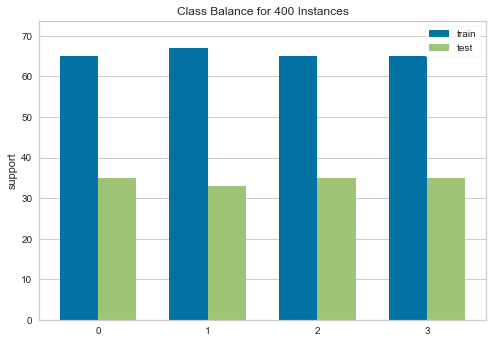

mean prediction naive bayes:  0.8043478260869565
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.94      0.97        33
           2       0.73      0.46      0.56        35
           3       0.58      0.83      0.68        35

    accuracy                           0.80       138
   macro avg       0.83      0.81      0.80       138
weighted avg       0.82      0.80      0.80       138

mean prediction SVM:  0.5869565217391305
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        35
           1       0.54      0.97      0.70        33
           2       0.00      0.00      0.00        35
           3       0.54      1.00      0.70        35

    accuracy                           0.59       138
   macro avg       0.52      0.59      0.49       138
weighted avg       0.52      0.59      0.49       138



D:\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean prediction SVC:  0.2391304347826087
mean prediction AdaBoostClassifier:  0.3333333333333333
mean prediction RandomForestClassifier:  0.2391304347826087
mean prediction DecisionTreeClassifier:  0.39855072463768115
mean prediction KNeighborsClassifier:  0.7391304347826086
mean prediction MLPClassifier:  0.4492753623188406
done


In [272]:


if __name__ == '__main__':
    main()